In [1]:
from src.hands_on_ml.chapter_3 import input_data, train, visual, evaluate
import warnings
from importlib import reload as rl
warnings.filterwarnings('ignore')

In [2]:
raw_data = input_data.run()

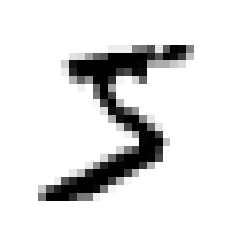

In [3]:
a_five = raw_data['X']['train'].iloc[0].values
visual.plot_mnist_sample(a_five)

In [4]:
five_data = {'X': {'train': raw_data['X']['train'],
                   'test': raw_data['X']['test']},
             'y': {'train': (raw_data['y']['train'] == 5),
                   'test': (raw_data['y']['test'] == 5)}}

In [5]:
sgd_five = train.five_detector(five_data['X']['train'],
                               five_data['y']['train'])
sgd_five.predict([a_five])

array([ True])

In [6]:
evaluate.cross_validation(data=five_data,
                          model=sgd_five)
# A deceptively high 'accuracy', which is biased by the frequency of '5' in the dataset.

[0.95035, 0.96035, 0.9604]

In [7]:
conf_matrix = evaluate.gen_confusion_matrix(five_data, sgd_five)

In [8]:
conf_matrix['confusion_matrix']

array([[53892,   687],
       [ 1891,  3530]])

In [9]:
conf_matrix['precision'], conf_matrix['recall']
# Not as promising as the 'accuracy' calculated earlier...

(0.8370879772350012, 0.6511713705958311)

In [10]:
conf_matrix['f1']

0.7325171197343846

In [11]:
sgd_five.decision_function([a_five])

array([2164.22030239])

In [16]:
precisions, recalls, thresholds = evaluate.gen_recall_curve(five_data, sgd_five)

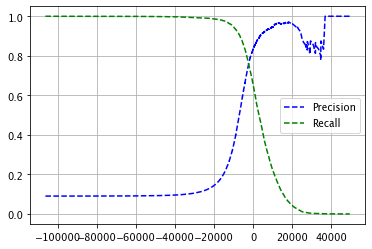

In [17]:
visual.plot_precision_recall_vs_threshold(precisions, recalls, thresholds)